In [2]:
import pandas as pd
from prophet import Prophet
from prophet.plot import *

In [3]:
# Read the data into a DataFrame
df = pd.DataFrame({
    'ds': ['2017-06-01', '2017-06-02', '2017-06-03', '2017-06-04', '2017-06-05', '2017-06-06', '2017-06-07',
       '2017-06-08', '2017-06-09', '2017-06-10', '2017-06-11', '2017-06-12', '2017-06-13', '2017-06-14',
        '2017-06-15', '2017-06-16', '2017-06-17', '2017-06-18', '2017-06-19', '2017-06-20', '2017-06-21',
       '2017-06-22', '2017-06-23', '2017-06-24', '2017-06-25', '2017-06-26', '2017-06-27', '2017-06-28', 
       '2017-06-29', '2017-06-30'],
    'y': [300.625, 298.125, 226.0, 192.5, 321.375, 314.375, 316.125, 331.125, 311.875, 221.25, 199.375, 317.5, 306.375, 322.0, 329.125, 323.75, 219.75, 181.375, 286.75, 308.5, 315.625, 316.625, 319.375, 227.0, 184.375, 305.0, 312.875, 300.75, 298.125, 310.125]

})

df['ds'] = pd.to_datetime(df['ds'])
df.tail()

,ds,y
25,2017-06-26,305.000
26,2017-06-27,312.875
27,2017-06-28,300.750
28,2017-06-29,298.125
29,2017-06-30,310.125


23:50:41 - cmdstanpy - INFO - Chain [1] start processing
23:50:41 - cmdstanpy - INFO - Chain [1] done processing


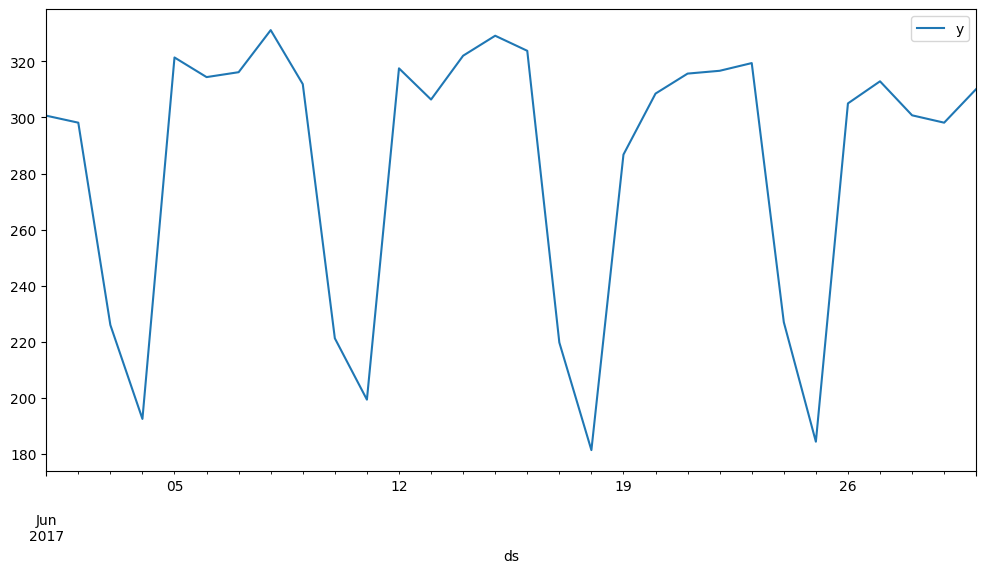

In [4]:
df.plot(x ='ds', y ='y', figsize =(12,6))

train_section=df.iloc[:21]
test_section=df.iloc[21:]

model = Prophet()
model.fit(train_section)
future_value = model.make_future_dataframe(periods=40)
forecast = model.predict(future_value)

In [5]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
56,2017-07-27,284.410176,258.585494,309.664536
57,2017-07-28,274.220219,248.532707,299.764785
58,2017-07-29,184.214414,155.781139,210.689749
59,2017-07-30,151.876416,124.610038,179.278277
60,2017-07-31,268.736990,240.150099,298.073941


In [6]:
plot_plotly(model, forecast)

In [7]:
plot_components_plotly(model, forecast)

In [8]:
from statsmodels.tools.eval_measures import rmse
from sklearn.metrics import mean_absolute_error

predictions = forecast.iloc[:9]['yhat']
test_data = test_section['y']

rmse_value = rmse(predictions, test_data)
mae_value = mean_absolute_error(predictions, test_data)

print("RMSE =", rmse_value)
print("MAE =", mae_value)
print("Mean =", test_data.mean())

RMSE = 11.557201341182195
MAE = 8.512571004647807
Mean = 286.02777777777777
